# physics760 - Problem Set 3

In [2]:
# Standard imports for computation physics
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots


## 3.3 A Long-Tailed Distribution

2048


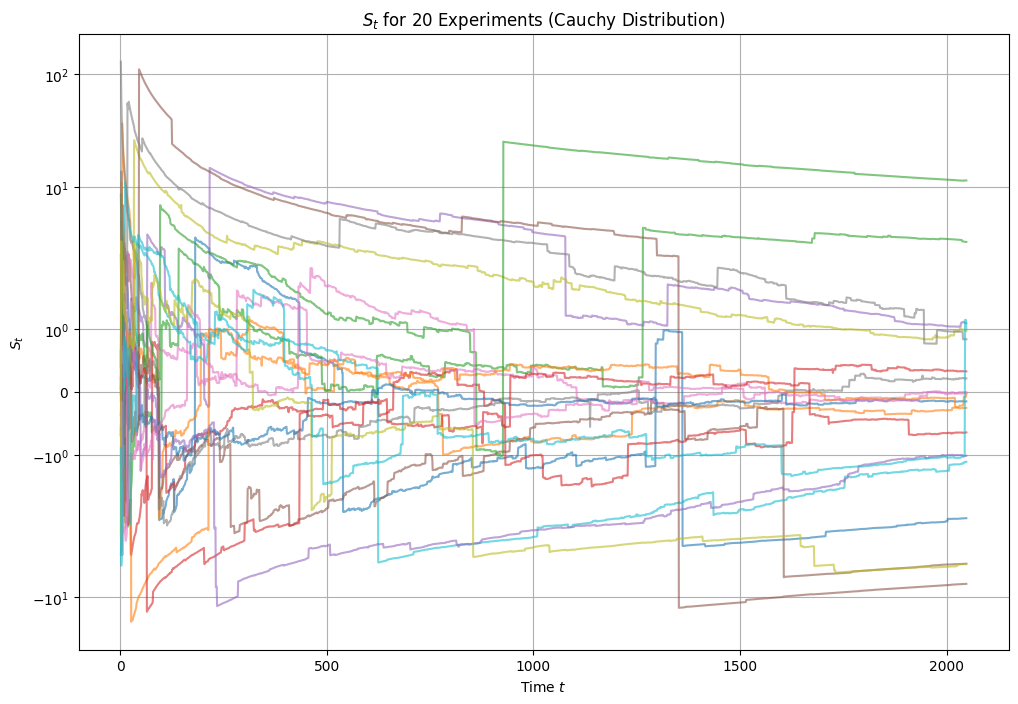

In [ ]:
X=1000 #N of Exp
T=2**11 #N of iid

#C_{0,1}
samples = np.random.standard_cauchy((X, T))
# print(len(samples))
S_t_all = np.cumsum(samples, axis=1) / np.arange(1, T + 1)

plt.figure(figsize=(12, 8))

for i in range(20):
    plt.plot(np.arange(1, T + 1),S_t_all[i], alpha=0.6)
plt.title('$S_t$ for 20 Experiments (Cauchy Distribution)')
plt.xlabel('Time $t$')
plt.ylabel('$S_t$')
plt.yscale('symlog')  # Symmetrical log scale for extreme values
plt.grid(True)
plt.show()

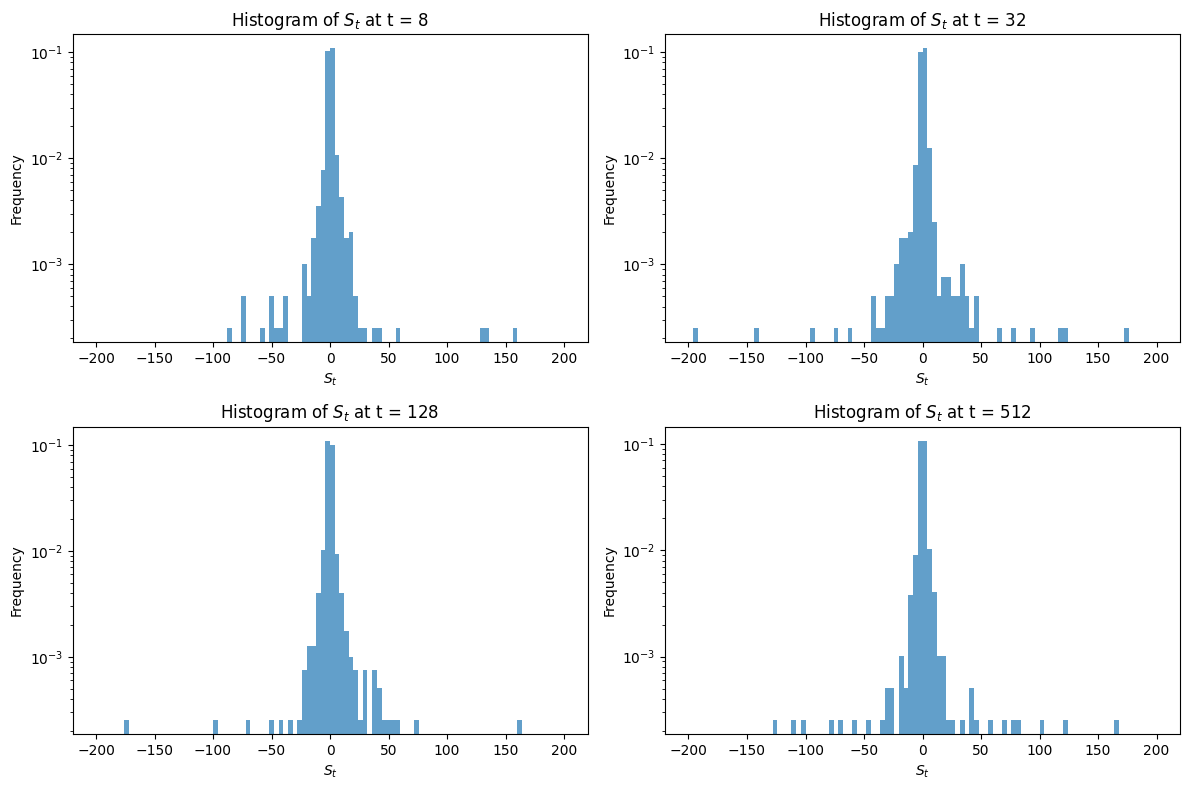

In [32]:
#draw the normalised histogram of St

times = [8, 32, 128, 512]
plt.figure(figsize=(12, 8))
for idx, t in enumerate(times):
    plt.subplot(2, 2, idx + 1)
    plt.hist(S_t_all[:, t-1], bins=100, density=True, range=(-200,200),alpha=0.7)
    plt.title(f'Histogram of $S_t$ at t = {t}')
    plt.xlabel('$S_t$')
    plt.ylabel('Frequency')
    plt.yscale('log')  # Log scale for better visibility
plt.tight_layout()
plt.show()

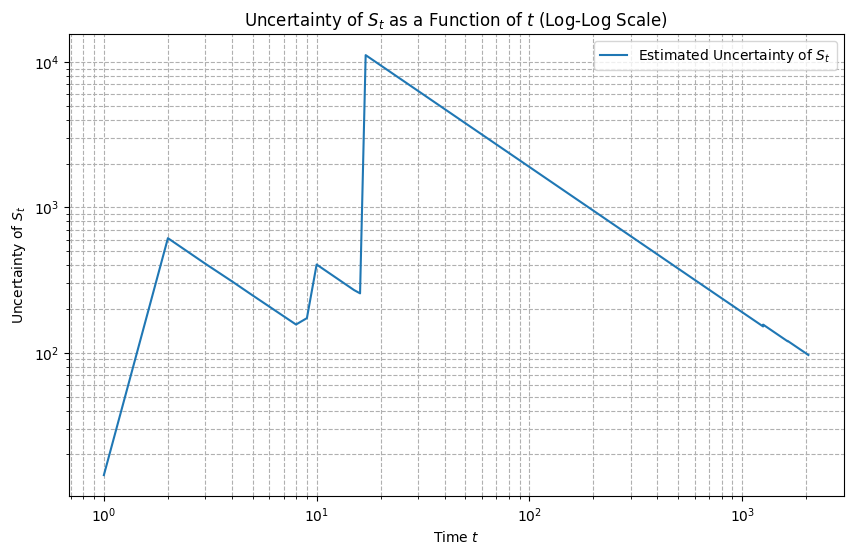

In [ ]:
#extimated uncertainty of St
# uncertainty = np.std(S_t_all, axis=0)
uncertainties=[]
for i in range(T):
    uncertainties.append(np.std(S_t_all[:, i],axis=0)) #calculate uncertainties of S_t for all t

plt.figure(figsize=(10, 6))
plt.loglog(np.arange(1, T + 1), uncertainties, label='Estimated Uncertainty of $S_t$')
plt.xlabel('Time $t$')
plt.ylabel('Uncertainty of $S_t$')
plt.title('Uncertainty of $S_t$ as a Function of $t$ (Log-Log Scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()